<a href="https://colab.research.google.com/github/m-arain/CST383Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam/Ham Machine Learning Classifier
#### Jason Contreras, Mohammad Arain, Robert Meis
####CST 383 Data Science
#### Spring 2021
####Professor Ergezer 

### Introduction
The purpose of this project is to create a Spam/Ham Classifier with high accuracy. Spam/Ham classifiers are a widely used technique for e-mail filtering. This project was undertaken because it piqued our interest, is popular in our field of computer science and is applicable towards our class curriculum.

In [1]:
# -*- coding: utf-8 -*-
"""
@authors: Robert Meis, Mohammad Arain, Jason Contreras
@team members: Jason Contreras, Mohammad Arain, Robert Meis
CST-383 Project: Spam vs. Ham Classifier 

References/Bibliography:
https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html
https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html
https://pandas.pydata.org/ (multiple pages)
https://scikit-learn.org/ (multiple pages)
https://seaborn.pydata.org/ (multiple pages)
https://matplotlib.org/ (multiple pages)
https://www.kite.com/python/answers/how-to-plot-a-bar-chart-using-a-dictionary-in-matplotlib-in-python
https://python-graph-gallery.com/3-control-color-of-barplots/
https://www.sciencedirect.com/science/article/pii/S2405844018353404

Spam/Ham Dataset is obtained here: https://www.kaggle.com/venky73/spam-mails-dataset

Data was downloaded on Feb 7 2021
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline

In [2]:
# code in this cell from: 
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

In [3]:
# switch to seaborn default stylistic parameters
sns.set()
sns.set_context('notebook') 

In [4]:
#df = pd.read_csv('spam_ham_dataset.csv') #keep both the .csv file and this file in the same folder or update file path
#read CSV data from a URL
df = pd.read_csv("https://raw.githubusercontent.com/m-arain/CST383Project/main/spam_ham_dataset.csv")
df0 = df; #copy df in case df gets modified incorrectly

### Selection of Data
Original source of the dataset: https://www.kaggle.com/venky73/spam-mails-dataset. <br/>
Data consists of a publicly available dataset containing a total of 5171(~5000) Enron emails.<br/>
Before data munging, original data consists of four columns: number, label, text, label_num

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
df.shape

(5171, 4)

####Data Fields
1. Unamed:0 (Number) - Unique id of Message
2. Label - Type of message (Spam or Ham)
3. Text - Actual Message
4. label_num - Type of message (0 = ham, 1 = Spam)

In [10]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

Text(0.5, 1.0, 'Total Data Set Spam vs. Ham Counts')

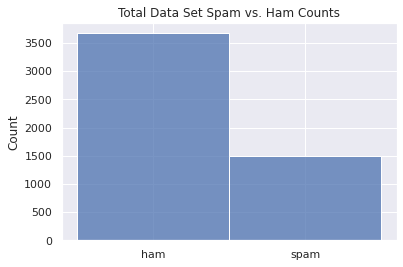

In [5]:
#Visualize Dataset
sns.histplot(data=df['label'].values)
plt.title('Total Data Set Spam vs. Ham Counts')

###Machine Learning
####Feature Engineering 
The 'email number' column is dropped to avoid bias and 'label' column is dropped because it is not necessary as the machine learning algorithmn will use numeric values.

In [ ]:
#Drop Columns
df.columns = ['number', 'label', 'subject', 'label_num'] #drop 'number' (= bias) and 'label' (not needed) columns
df.drop(['number', 'label'], axis=1, inplace=True) #

Each email subject began with "Subject: ". This was stripped from each email subject using Python string processing as it was both irrelevant and potentially biasing.

In [ ]:
#extract label and target vectors
X = df['subject'].str.strip('Subject: ') #X = labels vector. Strip word 'Subject: ' which appears in front of each email subject (not needed/biasing)
y = df['label_num'] #target vector

Data after data munging. Two columns: subject and label_num

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


### Methods
Tools used throughout the entire process include  <br/>
* Numpy, Pandas, Matplotlib, Scikit-Learn and Seaborn fo data analysis and visualization
* Github was used for version control
* Spyder as the IDE
* Google Collab for python notebook 
<br/> <br/>
Decision Tree, Naive-Bayes, and Random Forest machine learning algorithmns were all used to model the classifier.<br /><br />
kNN was also initially included but proved to be inefficient and less accurate than the other models.

TFIDF Vectorizer was used to transform each word or "term" in the email subject into a weighted value reflecting its frequency within a document type (spam or ham). TFIDF Vectorizer assigns an inverse weighting to terms occurring frequently across documents, such as "the" and "and," so words weighted highly are more meaningful. 

In [ ]:
#weight words using tfidVectorizer for X_train and X_test
vec = TfidfVectorizer()
X = vec.fit_transform(X)
X = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

The data is split into a training/test sets using a 70/30 split.

In [ ]:
#separate X and y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

Decision Trees are supervised non-parametric technique that is capable of classification and regression related work. The data is split continuusly depending on a specific parameter. The parameter max_depth represents the maximum depth of the tree.  

In [ ]:
#Decision Tree Model
clf = DecisionTreeClassifier(max_depth=100, random_state=0)
clf.fit(X_train, y_train)
dt_predict = clf.predict(X_test)

In [ ]:
#print Decision Tree Accuracy 
dt_accuracy = (dt_predict == y_test).mean() * 100
dt_num_correct = dt_predict[dt_predict == y_test]
print("Decision Tree Accuracy {:.2f}".format(dt_accuracy))

Decision Tree Accuracy 94.97


Naive-Baiyes is a context classifier that applies Bayes' theorem on the context of each email. It assumes the words in each e-mail are independent from each other.

In [ ]:
#Naive-Bayes model
clf = MultinomialNB()
clf.fit(X_train, y_train)
nb_predict = clf.predict(X_test)

In [ ]:
#print Naive-Bayes Accuracy
nb_accuracy = (nb_predict == y_test).mean() * 100
nb_num_correct = nb_predict[nb_predict == y_test]
print('Naive-Bayes Accuracy {:.2f}'.format(nb_accuracy))

Naive-Bayes Accuracy 86.66


Random Forests is an ensemble algorithm that uses bagging (or bootstrap aggregation). A certain number of decision trees are created for a specific problem and merged together for a more accurate prediction.  

In [ ]:
#Random Forest Model
clf = RandomForestClassifier(max_depth = 100, min_samples_split=10, min_samples_leaf=1, random_state = 0)
clf.fit(X_train, y_train)
rf_predict = clf.predict(X_test)

In [ ]:
#print Random Forest Accuracy
rf_accuracy = (rf_predict == y_test).mean() * 100
rf_num_correct = rf_predict[rf_predict == y_test]
print('Random Forest Accuracy {:.2f}'.format(rf_accuracy))

Random Forest Accuracy 97.04


Text(0.5, 1.0, 'Model Accuracy on Novel (untrained) Email Sample (n = ~1,500)')

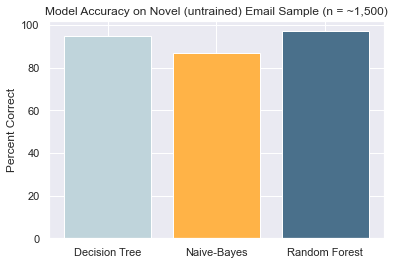

In [ ]:
#Visualization
accuracies = {'Decision Tree':dt_accuracy, 'Naive-Bayes': nb_accuracy, 'Random Forest':rf_accuracy}

plt.bar(accuracies.keys(), accuracies.values(), color=('#bfd4db', '#ffb347', '#4a708b'))
plt.ylabel('Percent Correct')
plt.title('Model Accuracy on Novel (untrained) Email Sample (n = ~1,500)')

In [ ]:
####Notes
'''
 kNN was also tested but omitted due to limited accuracy and significant test run time
#use kNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test[:50])
print(predictions, y_test[:50])
'''

'\n kNN was also tested but omitted due to limited accuracy and significant test run time\n#use kNN\nknn = KNeighborsClassifier()\nknn.fit(X_train, y_train)\npredictions = knn.predict(X_test[:50])\nprint(predictions, y_test[:50])\n'

### Results
With default values for each model, Naive-Bayes showed the highest accuracy at 87% vs. 80% for Decision Trees.<br/><br/>
Tuning Decision Trees to have a max leaf depth of greater than or equal to 15 led to a higher accuracy on untrained test data, with an optimal accuracy of 0.94 at a max_depth = 15. Furthermore, higher max_depth values provided minimal or no additional improvement. <br/><br/>
Random Forest was then tested to determine whether it would provide a higher accuracy level vs. Decision Trees. Using default params, Random Forest had lower accuracy than Decision Trees (around 70%). Experimental tuning of parameters increased accuracy slightly, such as setting a min_samples_split to 10. However, expanding the max_depth parameter of Random Forest to 100 increased its accuracy to 97%, the highest of any of the three models.

### Discussion 
The results do imply that the three linear ML classifiers tested (Decision Tree, Naive-Bayes and Random Forest) are all viable approaches for a spam/ham classifier; which aligns with what researchers say according to ScienceDirect. The 97% accuracy on Random Forest also does reinforce the fact that Random Forest is capable of high classification accuracies and worked best for our goal of a high accuracy. Other potential factors to extend this project in the future could include grid search for decision trees, boosting, support vector machines(SVS) and Artificial Nueral networks (ANN).

### Summary
Based on the simulation results Decision Tree, Naive-Bayes and Random Forest have all proven to be capable machine learning algorithmns to base a spam/ham classifier off. In this case Random Forest was the most capable with 97% accuracy with minimal tuning. kNN Neighborsclassifier proved to be inefficient for our large dataset as the TFDIF Vectorizer produced too many columns for kNN to handle. The goal of building a spam/ham classifier with high accuracy was achieved.


###References/Bibliography

References/Bibliography:
https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html
https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html
https://pandas.pydata.org/ (multiple pages)
https://scikit-learn.org/ (multiple pages)
https://seaborn.pydata.org/ (multiple pages)
https://matplotlib.org/ (multiple pages)
https://www.kite.com/python/answers/how-to-plot-a-bar-chart-using-a-dictionary-in-matplotlib-in-python
https://python-graph-gallery.com/3-control-color-of-barplots/
https://www.sciencedirect.com/science/article/pii/S2405844018353404

Spam/Ham Dataset is obtained here: https://www.kaggle.com/venky73/spam-mails-dataset

Data was downloaded on Feb 7 2021